In [2]:
pip install -u pandas-datareader

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [11]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [1]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#get stock price
df = web.DataReader('GOOGL', data_source='yahoo', start='2018-01-01', end='2021-05-01')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1075.979980,1053.020020,1053.020020,1073.209961,1588300,1073.209961
2018-01-03,1096.099976,1073.430054,1073.930054,1091.520020,1565900,1091.520020
2018-01-04,1104.079956,1094.260010,1097.089966,1095.760010,1302600,1095.760010
2018-01-05,1113.579956,1101.800049,1103.449951,1110.290039,1512500,1110.290039
2018-01-08,1119.160034,1110.000000,1111.000000,1114.209961,1232200,1114.209961
...,...,...,...,...,...,...
2021-04-26,2324.530029,2297.320068,2304.520020,2309.929932,1601900,2309.929932
2021-04-27,2318.449951,2286.159912,2317.629883,2290.979980,2219300,2290.979980
2021-04-28,2431.379883,2353.219971,2392.500000,2359.040039,4055300,2359.040039


In [3]:
df.shape

(838, 6)

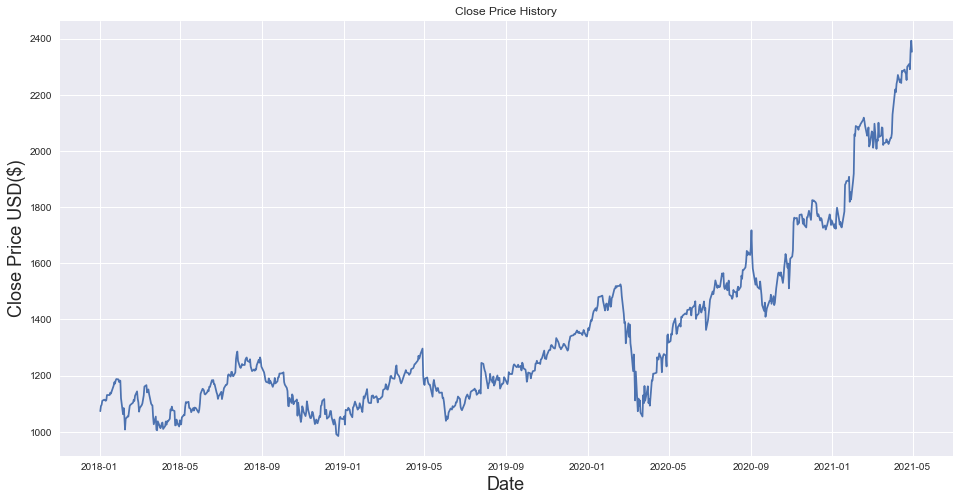

In [4]:
#plot
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [5]:
# p = order of the AR term
# d = # of differencing required to make time series stationary
# q = the order of the MA term



In [6]:
df = df[['Close']].copy()

In [7]:
df.describe()

,Close
count,838.000000
mean,1341.457827
std,302.857691
min,984.669983
25%,1125.500000
50%,1220.570007
75%,1478.309967
max,2392.760010


In [8]:
df.head()

,Close
Date,
2018-01-02,1073.209961
2018-01-03,1091.520020
2018-01-04,1095.760010
2018-01-05,1110.290039
2018-01-08,1114.209961


In [9]:
#check price to check if time series is stationary

from statsmodels.tsa.stattools import adfuller
#ADF test will tell us if model is stationary. If p-value is greater than .05 we can conclude it is not stationary

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 1.086715954239282
p-value: 0.9951016387801966


In [18]:
from statsmodels.graphics.tsaplots import plot_acf


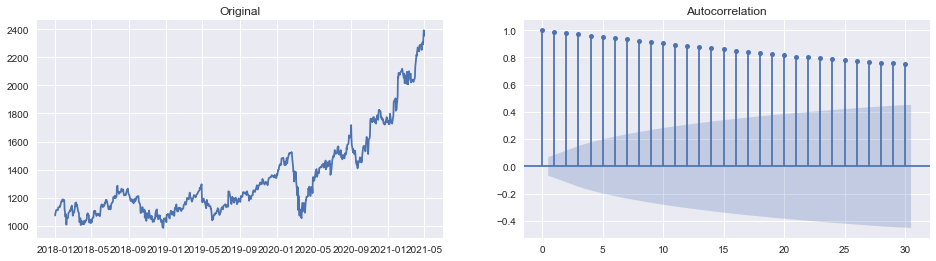

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close, ax=ax2);

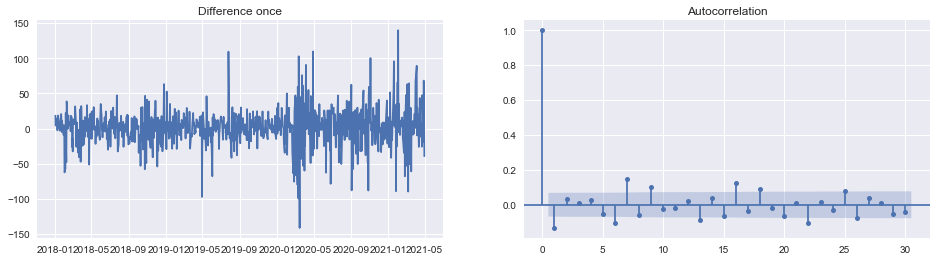

In [24]:
# check if we difference once

diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

In [29]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [30]:
from pmdarima.arima.utils import ndiffs

In [31]:
#double checking our # of difference on 'Close'

ndiffs(df.Close, test='adf')

1

In [ ]:
#Finding p. p is order of the Auto Regressive term. The # of lags to be used as a predictor

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf

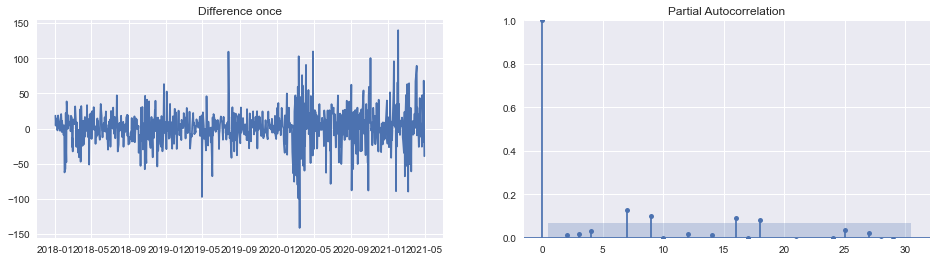

In [35]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

#we see 7, 9 16, 17 can be used as p terms

In [ ]:
#Finding q. q is order of the moving average. The # of lagged forecast errors that should go into ARIMA model

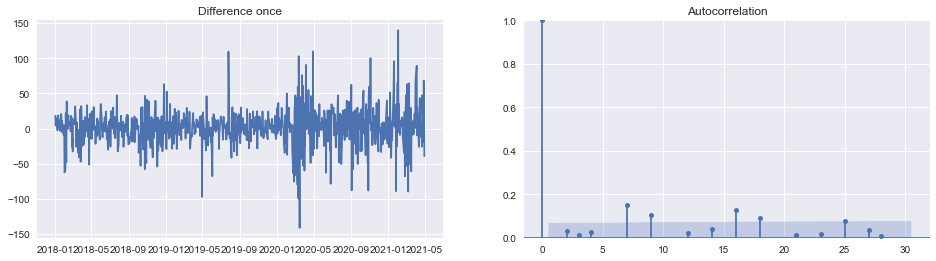

In [36]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

#we can see our q term could be 7, 9, 16

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#Starting ARIMA Model

In [64]:
model = ARIMA(df.Close, order=(6, 1, 7))

result = model.fit(disp=0)

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [65]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  669
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -3019.167
Method:                       css-mle   S.D. of innovations             22.024
Date:                Wed, 12 May 2021   AIC                           6060.335
Time:                        15:59:05   BIC                           6109.898
Sample:                             1   HQIC                          6079.534
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6582      0.186      3.541      0.000       0.294       1.023
ar.L1.D.Close    -0.7254      0.086     -8.461      0.000      -0.893      -0.557
ar.L2.D.Close     0.7001      0.052     

In [66]:
# Plot residual errors
residuals = pd.Dataframe(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, desity=True)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [ ]:
#Train test split

In [67]:
n = int(len(df) *0.8)
train = df.Close[:n]
test= df.Close[n:]

In [51]:
#check split correctly
print(len(train))
print(len(test))

670
168


In [68]:
model = ARIMA(train, order=(6, 1, 3))
result= model.fit(disp=0)

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [69]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  669
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -3019.167
Method:                       css-mle   S.D. of innovations             22.024
Date:                Wed, 12 May 2021   AIC                           6060.335
Time:                        16:00:30   BIC                           6109.898
Sample:                             1   HQIC                          6079.534
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6582      0.186      3.541      0.000       0.294       1.023
ar.L1.D.Close    -0.7254      0.086     -8.461      0.000      -0.893      -0.557
ar.L2.D.Close     0.7001      0.052     13.381      0.000       0.598       0.803
ar.L3.D.Close     0.9051      0.082     10.974      0.000       0.743       1.067
ar.L4.D.Close     0.1562      0.057      2.747      0.006       0.045       0.268
ar.L5.D.Close     0.0093      0.048      0.191      0.848      -0.086       0.104
ar.L6.D.Close    -0.1110      0.046     -2.402      0.016      -0.202      -0.020
ma.L1.D.Close     0.5964      0.079      7.541      0.000       0.441       0.751
ma.L2.D.Close    -0.8257      0.030    -27.933      0.000      -0.884      -0.768
ma.L3.D.Close    -0.7706      0.068    -11.332      0.000      -0.904      -0.637
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9496           -0.4343j            1.0441           -0.4317
AR.2           -0.9496           +0.4343j            1.0441            0.4317
AR.3            1.0191           -0.0000j            1.0191           -0.0000
AR.4           -0.6842           -1.7347j            1.8647           -0.3098
AR.5           -0.6842           +1.7347j            1.8647            0.3098
AR.6            2.3320           -0.0000j            2.3320           -0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -1.0358           -0.4742j            1.1391           -0.4317
MA.3           -1.0358           +0.4742j            1.1391            0.4317
-----------------------------------------------------------------------------
"""

In [74]:
step = 60

fc, se, conf = result.forecast(step)

In [75]:
fc

array([1643.28937963, 1635.63888942, 1637.17276521, 1631.55037637,
       1632.25802623, 1626.86975191, 1625.96847667, 1623.51882079,
       1619.71927409, 1619.77690454, 1614.63180621, 1615.21574173,
       1610.76930311, 1610.03563678, 1607.64523968, 1604.92146731,
       1604.48492337, 1600.55373053, 1600.79108682, 1597.1486199 ,
       1596.61402877, 1594.39402278, 1592.42566864, 1591.72825237,
       1588.74640582, 1588.73542703, 1585.79910639, 1585.38501723,
       1583.40922885, 1581.98618566, 1581.17587265, 1578.93167036,
       1578.76101543, 1576.42883467, 1576.09267258, 1574.3924406 ,
       1573.36530354, 1572.5422636 , 1570.86937207, 1570.61042392,
       1568.78649437, 1568.50802623, 1567.08703498, 1566.35066673,
       1565.57957858, 1564.34883519, 1564.05644075, 1562.65494769,
       1562.4266355 , 1561.27200998, 1560.75299215, 1560.07271727,
       1559.1848176 , 1558.89921188, 1557.84586853, 1557.66670623,
       1556.75658251, 1556.40388427, 1555.83501432, 1555.21419

In [76]:
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)

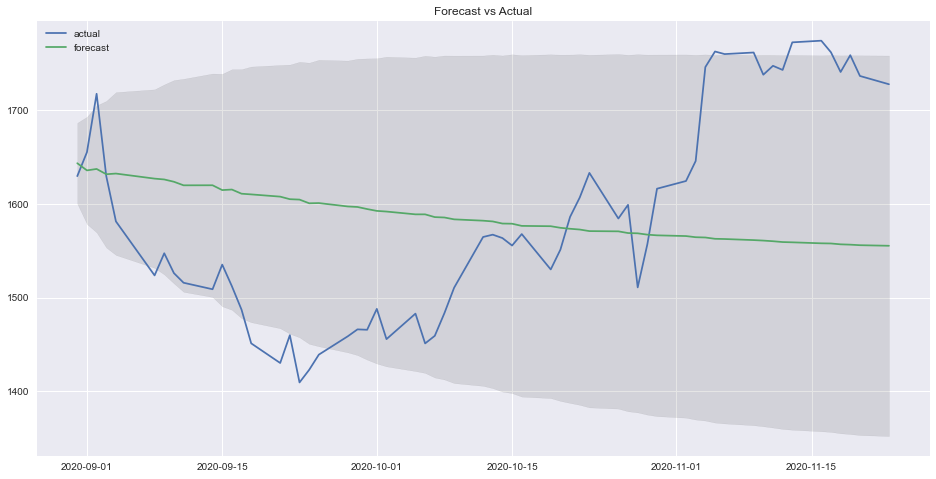

In [77]:
plt.figure(figsize=(16,8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

In [83]:
model.score(test)

Exception: Data must be 1-dimensional